**Problem statement**:

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.

**Objective**: Take advantage of all of the feature variables available below, use it to analyse and predict house prices.

- cid: a notation for a house
- dayhours: Date house was sold
- price: Price is prediction target
- room_bed: Number of Bedrooms/House
- room_bath: Number of bathrooms/bedrooms
- living_measure: square footage of the home
- lot_measure: quare footage of the lot
- ceil: Total floors (levels) in house
- coast: House which has a view to a waterfront
- sight: Has been viewed
- condition: How good the condition is (Overall)
- quality: grade given to the housing unit, based on grading system
- ceil_measure: square footage of house apart from basement
- basement_measure: square footage of the basement
- yr_built: Built Year
- yr_renovated: Year when house was renovated
- zipcode: zip
- lat: Latitude coordinate
- long: Longitude coordinate
- living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- lot_measure15: lotSize area in 2015(implies-- some renovations)
- furnished: Based on the quality of room
- total_area: Measure of both living and lot

### Imports

In [310]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="HBFZ14J63ox8YgtKSiEQ6Gqbo",
                        project_name="MLCapstone_1", workspace="prasad-ml")

ImportError: You must import Comet before these modules: sklearn

In [ ]:
# Numerical calculation
import numpy as np
from scipy.stats import zscore
from scipy import stats
import warnings

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sample and parameter tuning
from sklearn.model_selection import train_test_split

# Feature Engineering
from sklearn.decomposition import PCA

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression,Ridge, Lasso

### Load Dataset

In [ ]:
warnings.filterwarnings('ignore')
# Load the dataset into a Pandas dataframe called housedata
housedata = pd.read_csv('innercity.csv')

# Save an original copy of the dataframe
housedata_original = housedata.copy()

### Exploratory Data Analysis

1. Univariate analysis
  - Univariate analysis – data types and description of the independent attributes which should include name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers
2. Multivariate analysis 
  - Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes
3. Strategies to address the different data challenges such as data pollution, outliers and missing values


In [ ]:
housedata.head()

In [ ]:
housedata.info()

In [305]:
housedata.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,total_area
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652,0.196687,1.718687e+04
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631,0.397503,4.158908e+04
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.000000,1.423000e+03
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,0.000000,7.035000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,0.000000,9.575000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,0.000000,1.300000e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,1.000000,1.652659e+06


### Univariate Analysis
Let's explore the spread of data points, presence of any outliers for all attributes. We will be using the following plots for this analysis.
- Density curve with histogram
- boxplot
- pie chart
- countplot
- pointplot

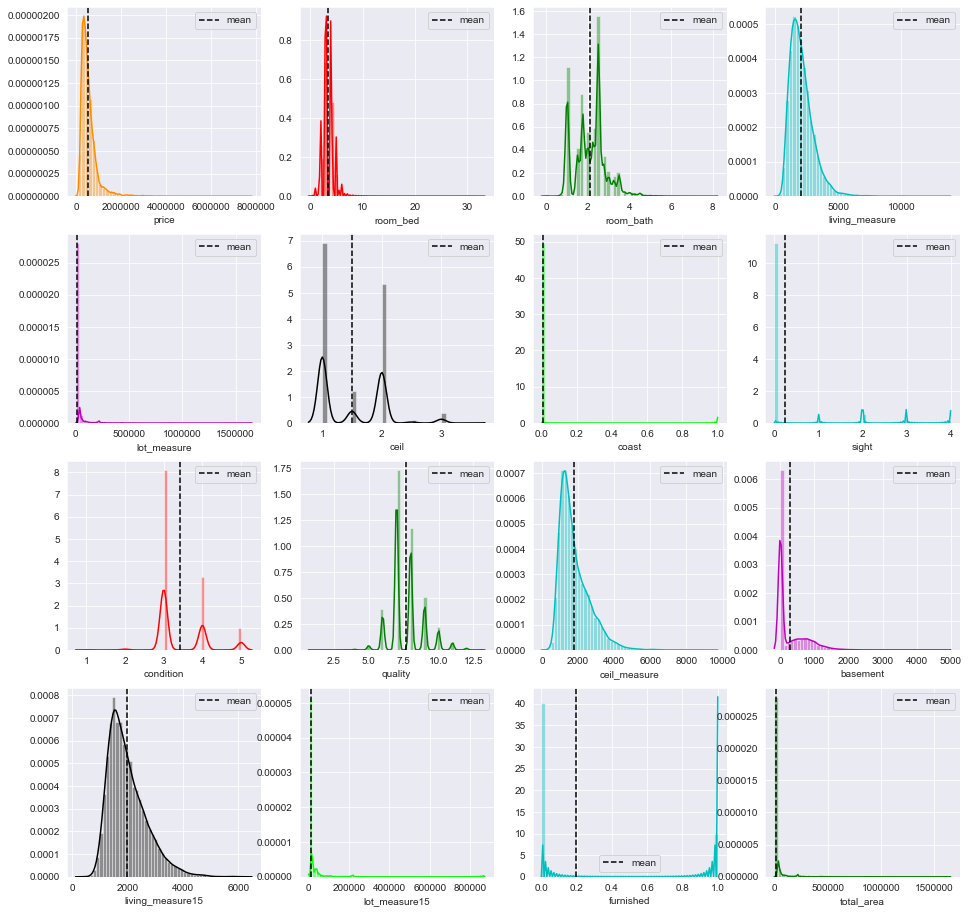

In [306]:
import itertools
# Analyze the body of the distributions
cols = [i for i in housedata.columns if i not in ('cid','dayhours','lat','long','zipcode','yr_built','yr_renovated')]
fig = plt.figure(figsize=(16,16))
for i,j,k in itertools.zip_longest(cols, range(len(cols)), ["darkorange","r","g","c","m","k","lime","c","r","g","c","m","k","lime","c","g"]):
    plt.subplot(4,4,j+1)
    ax = sns.distplot(housedata[i],color=k)
    plt.axvline(housedata[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

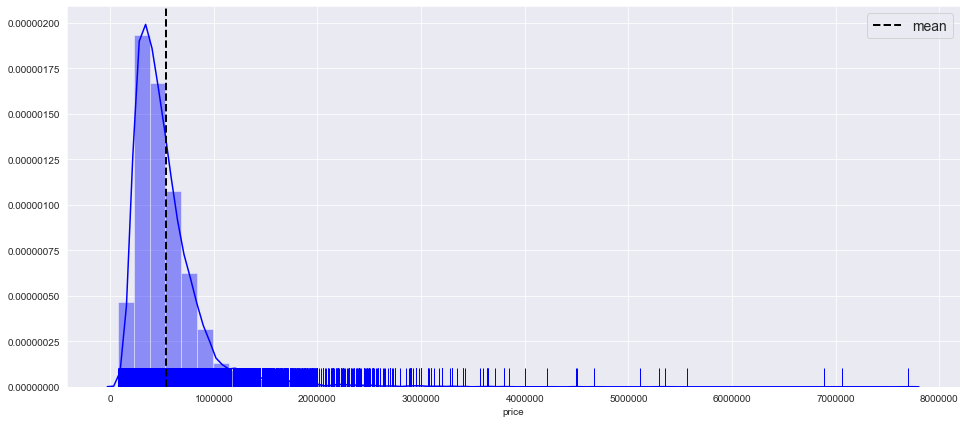

In [307]:
# Target feature "Comprehensive Strength" distribution
plt.figure(figsize=(16,7))
sns.set_style('darkgrid', {'axes.grid' : True})
sns.distplot(housedata["price"],color="b",rug=True)
plt.axvline(housedata["price"].mean(), linestyle="dashed", color="k", label='mean', linewidth=2)
plt.legend(loc="best",prop={"size":14})

**Observations:**
- It seems there is presence of long tails in almost all of the columns indicates outliers
- The distribution of *price* feature seems to be left skewed or having outliers.
- There are clearly bumps visible in *ceil*, *condition* and *quality* features

In [308]:
# Check for any Non-Real value present in the dataset such as '?' or '*' etc.
housedata[~housedata.applymap(np.isreal)].sum(axis=0)

price               0.0
room_bed            0.0
room_bath           0.0
living_measure      0.0
lot_measure         0.0
ceil                0.0
coast               0.0
sight               0.0
condition           0.0
quality             0.0
ceil_measure        0.0
basement            0.0
yr_built            0.0
yr_renovated        0.0
living_measure15    0.0
lot_measure15       0.0
furnished           0.0
total_area          0.0
dtype: float64

**Observations**
- dayhours column is having datetime in string format
- Need to convert dayhours to datetime format

In [309]:
#Convert dayhours to datetime format
from datetime import datetime

housedata['dayhours'] = pd.to_datetime(housedata['dayhours'], format='%Y%m%dT%H%M%S')

KeyError: 'dayhours'

In [ ]:
housedata.head()

In [ ]:
#Remove un necessary columns
housedatabkp = housedata

columns = ['dayhours','cid','zipcode','lat','long']
housedata = housedata.drop(columns, axis=1)

In [ ]:
# Check for Nan/missing values
housedata.applymap(np.isnan).sum(axis=0)

#For identifying NaN values in price
#housedata[mydata['price'].isnull()]

In [ ]:
# Find out the count of 0s in each column
(housedata == 0.0).sum(axis=0)

In [ ]:
housedata.sight.value_counts()

**Observations:**
- There are no Nan values present in dataset
- columns coast, sight, basement, yr_renovated, furnished has many zero values
- However furnished and coast are bollean values
- we are going to convert yr_renovated column to boolean value to know whether it has renovated or not

In [ ]:

#convert values to ints:
#housedata['price'] = housedata['price'].astype(int)
housedata['price'] = housedata['price'].fillna(0).astype(int)

In [ ]:
#Coralation plot
corr = housedata.corr()

# Top 50% Corralation train attributes with price
top_feature = corr.index[abs(corr['price']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = housedata[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### Outlier Treatement

In [ ]:
# Plot the central tendency of the dataset
_, bp = housedata.boxplot(return_type='both', figsize=(20,10))

In [ ]:
# Plot the columns which are having too many outliers
_, bp = housedata.boxplot(column=["price","lot_measure","total_area","lot_measure15"],return_type='both', figsize=(20,10))

In [ ]:
# Plot the central tendency excluding cid field
_, bp = housedata.boxplot(column=[
'living_measure',
'ceil_measure',
'living_measure15'
],return_type='both', figsize=(20,10), rot='vertical')

In [ ]:
# # outliers capping for price
# q3 = housedata.price.quantile(0.75)
# high = q3 + 1.5*(q3 - housedata.price.quantile(0.25))
# housedata.loc[(housedata.price > high), 'price'] = high
# print (high)
# # outliers capping for lot_measure
# q3 = housedata.lot_measure.quantile(0.75)
# high = q3 + 1.5*(q3 - housedata.lot_measure.quantile(0.25))
# housedata.loc[(housedata.lot_measure > high), 'lot_measure'] = high
# print (high)
# outliers capping for total_area
# q3 = housedata.total_area.quantile(0.75)
# high = q3 + 1.5*(q3 - housedata.total_area.quantile(0.25))
# housedata.loc[(housedata.total_area > high), 'total_area'] = high
# print (high)
# # # outliers capping for lot_measure15
# # q3 = housedata.lot_measure15.quantile(0.75)
# # high = q3 + 1.5*(q3 - housedata.lot_measure15.quantile(0.25))
# # housedata.loc[(housedata.lot_measure15 > high), 'lot_measure15'] = high
# # print (high)
# # outliers capping for living_measure
# q3 = housedata.living_measure.quantile(0.75)
# high = q3 + 1.5*(q3 - housedata.living_measure.quantile(0.25))
# housedata.loc[(housedata.living_measure > high), 'living_measure'] = high
# # outliers capping for ceil_measure
# q3 = housedata.ceil_measure.quantile(0.75)
# high = q3 + 1.5*(q3 - housedata.ceil_measure.quantile(0.25))
# housedata.loc[(housedata.ceil_measure > high), 'ceil_measure'] = high
# # # outliers capping for basement
# # q3 = housedata.basement.quantile(0.75)
# # high = q3 + 1.5*(q3 - housedata.basement.quantile(0.25))
# # housedata.loc[(housedata.basement > high), 'basement'] = high
# # outliers capping for living_measure15
# q3 = housedata.living_measure15.quantile(0.75)
# high = q3 + 1.5*(q3 - housedata.living_measure15.quantile(0.25))
# housedata.loc[(housedata.living_measure15 > high), 'living_measure15'] = high

In [ ]:
# Plot the central tendency of the dataset
# _, bp = housedata.boxplot(column=["price","lot_measure","total_area","lot_measure15"],return_type='both', figsize=(20,10))

In [ ]:
# # Plot the central tendency excluding cid field
# _, bp = housedata.boxplot(column=[
# 'living_measure',
# 'ceil_measure',
# 'basement',
# 'living_measure15'
# ],return_type='both', figsize=(20,10), rot='vertical')

In [ ]:
#Removee cid, zipcode,lat and long columns
mydata = housedata[['price','room_bed','room_bath','living_measure','lot_measure','ceil','coast','sight','condition',
'quality',
'ceil_measure',
'basement',
'living_measure15',
'lot_measure15',
'yr_built',
'furnished',
'total_area']]

### Bivariate Analysis
Let's explore the relationship among the predictor variables and between the predictor variables and target column. We will be using the density curve plus histogram, scatterplot and pairplots for this analysis.
#### Pairplot
Pairplot helps picturizing the pair wise relationship between two variables. It creates a square matrix of no. of continous attributes of the dataset. The diagonal plots represents the histogram and/or the kde plot of a particular attributes where as the upper or lower trangular plots represents the co-linearity of two attributes.

In [ ]:
#sns.pairplot(mydata)

### Feature Engineering

In [ ]:
#Findout 
mydata.head(20)

In [ ]:
mydata.iloc[16785]

#### Log Transform

In [ ]:
#we use log function which is in numpy
mydata['price'] = np.log1p(mydata['price'])
# mydata['living_measure'] = np.log1p(mydata['living_measure'])
# mydata['ceil_measure'] = np.log1p(mydata['ceil_measure'])
# mydata['living_measure15'] = np.log1p(mydata['living_measure15'])
# mydata['lot_measure'] = np.log1p(mydata['lot_measure'])
# mydata['total_area'] = np.log1p(mydata['total_area'])
# mydata['lot_measure15'] = np.log1p(mydata['lot_measure15'])
# mydata['basement'] = np.log1p(mydata['basement'])


#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(mydata['price'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(mydata['price'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(mydata['price'], plot=plt)
plt.show()

**Observation**
- Performance of model is degraded after Log transform
- Hence avoiding this

#### Z Score 

In [ ]:
# mydata = mydata.apply(zscore)
# mydata.describe()

#### MinMaxScalar

#### Feature Scoring

In [ ]:
#Arrange data into independent and dependent variables
X = mydata.drop('price', axis=1)
y = mydata[['price']]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest( k ='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features

In [ ]:
#Removing less scored features
columns=['coast','lot_measure','lot_measure15','total_area']
mydata = mydata.drop(columns, axis=1)
mydata.head()

#### PCA

In [ ]:
# #Fitting the PCA algorithm with our Data
# pca = PCA().fit(X)
# #Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('Dataset Explained Variance')
# plt.show()

In [ ]:
# pca = PCA(n_components=10)
# mydata_pca = pca.fit_transform(X)
# mydata_df = pd.DataFrame(mydata_pca)  

In [ ]:
# #Testing PCA with Linear Regression
# #Split data into Train and test
# #Size of test data is 30% of original data
# X_train, X_test, y_train, y_test = train_test_split(mydata_df, y, test_size=0.30, random_state=1)

# regression_model = LinearRegression()
# regression_model.fit(X_train, y_train)
# print(regression_model.score(X_train, y_train))
# print(regression_model.score(X_test, y_test))

In [ ]:
# # Test with Support Vector Regresser
# from sklearn.svm import SVR
# svc_model = SVR(C= .5,kernel='linear',gamma=1)
# svc_model.fit(X_train, y_train)

# prediction = svc_model.predict(X_test)
# #print(prediction)
# #print(svc_model.support_vectors_)

# print(svc_model.score(X_test, y_test))
# print(svc_model.score(X_train, y_train))

#### Observation
- PCA reduced number of dimensions to 8
- But performance of model is not upto the mark

### Generte Polynomial Model

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [ ]:
# X_poly = poly.fit_transform(X)
# X_te, X_test, y_te, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_te, y_te, test_size=0.20, random_state=1)
# X_train.shape

In [ ]:
# #Fit linear modelon poly features
# regression_model.fit(X_train, y_train)
# print(regression_model.coef_[0])

In [ ]:
# print(regression_model.score(X_train, y_train))
# print(regression_model.score(X_val, y_val))

**Observations**
- Polynomial features is not giving good results
- Hence ignoring this

## Modelling

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#Arrange data into independent and dependent variables
X = mydata.drop('price', axis=1)
y = mydata[['price']]

In [ ]:
#Split data into Train and test
#Size of test data is 30% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#### Linear Regression

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


In [ ]:

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
print ("Ridge model :",(ridge.coef_))
print ('')
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print ("Lasso model :",(lasso.coef_))
print ('')
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

#### SVM

In [ ]:
# # Test with Support Vector Regresser
# from sklearn.svm import SVR
# svc_model = SVR(C= .5,kernel='linear',gamma=1)
# svc_model.fit(X_train, y_train)

# prediction = svc_model.predict(X_test)
# #print(prediction)
# #print(svc_model.support_vectors_)

# print(svc_model.score(X_test, y_test))
# print(svc_model.score(X_train, y_train))

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
df_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_split=2,max_features=10,random_state=1)
df_model.fit(X_train, y_train)

print(df_model.score(X_train, y_train))
print(df_model.score(X_test,y_test))

In [ ]:
#Make predictions using predict
predictions = df_model.predict(X_test)

print('r^2: ', r2_score(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(max_depth=15, n_estimators = 15)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
# Accuracy of train and test data
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test,y_test))

In [ ]:
#Make predictions using predict
predictions = rfcl.predict(X_test)

print('r^2: ', r2_score(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))

#### Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(n_estimators=60, max_samples=.4 , oob_score=True)

bgcl = bgcl.fit(X, y)
print(bgcl.oob_score_)

#### Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(base_estimator=rfcl, n_estimators=50)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
print (abcl.score(X_test , y_test))
print (abcl.score(X_train , y_train))

In [ ]:
#Make predictions using predict
print('r^2: ', r2_score(test_pred, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))

#### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.09, max_depth=10)
gbcl = gbcl.fit(X_train, y_train)

# Accuracy of test data
print(gbcl.score(X_test , y_test))
print(gbcl.score(X_train , y_train))